In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
players_df = pd.read_excel('NBA_Data.xlsx')

In [3]:
players_df.head()

,Year,Season_Type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,2012-13,Regular%20Season,2546,1,Carmelo Anthony,1610612752,NYK,67,37.0,10.0,...,0.830,2.0,4.9,6.9,2.6,0.8,0.5,2.6,28.7,23.2
1,2012-13,Regular%20Season,201142,2,Kevin Durant,1610612760,OKC,81,38.5,9.0,...,0.905,0.6,7.3,7.9,4.6,1.4,1.3,3.5,28.1,30.4
2,2012-13,Regular%20Season,977,3,Kobe Bryant,1610612747,LAL,78,38.6,9.5,...,0.839,0.8,4.7,5.6,6.0,1.4,0.3,3.7,27.3,24.6
3,2012-13,Regular%20Season,2544,4,LeBron James,1610612748,MIA,76,37.9,10.1,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,26.8,32.2
4,2012-13,Regular%20Season,201935,5,James Harden,1610612745,HOU,78,38.3,7.5,...,0.851,0.8,4.1,4.9,5.8,1.8,0.5,3.8,25.9,24.0


In [4]:
players_df.shape

(4210, 27)

<font size="6">  
    Data Cleaning
</font> 

In [5]:
players_df.isna().sum()

Year           0
Season_Type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PTS            0
EFF            0
dtype: int64

In [6]:
# Drop columns we do not need
players_df.drop(columns = ['PLAYER_ID', 'RANK','TEAM_ID','EFF'], inplace=True)

In [7]:
# Check number of teams, it should be 30
players_df['TEAM'].nunique()

31

In [8]:
# NOH & NOP should be same team, need to change NOH to NOP
players_df['TEAM'].unique()

array(['NYK', 'OKC', 'LAL', 'MIA', 'HOU', 'GSW', 'POR', 'BKN', 'MIL',
       'BOS', 'TOR', 'LAC', 'UTA', 'CHA', 'PHI', 'ATL', 'IND', 'SAC',
       'DEN', 'CHI', 'NOH', 'DET', 'MEM', 'DAL', 'PHX', 'ORL', 'MIN',
       'CLE', 'WAS', 'SAS', 'NOP'], dtype=object)

In [9]:
players_df['TEAM'].replace(to_replace='NOH', value = 'NOP', inplace = True)

In [10]:
players_df['TEAM'].unique()

array(['NYK', 'OKC', 'LAL', 'MIA', 'HOU', 'GSW', 'POR', 'BKN', 'MIL',
       'BOS', 'TOR', 'LAC', 'UTA', 'CHA', 'PHI', 'ATL', 'IND', 'SAC',
       'DEN', 'CHI', 'NOP', 'DET', 'MEM', 'DAL', 'PHX', 'ORL', 'MIN',
       'CLE', 'WAS', 'SAS'], dtype=object)

In [11]:
# Replace "Regular%20Season" to "Regular_Season"
players_df['Season_Type'].replace(to_replace='Regular%20Season', value = 'Regular_Season', inplace=True)

In [12]:
players_df.sample(10)

,Year,Season_Type,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS
3462,2021-22,Regular_Season,Darius Garland,CLE,68,35.7,8.0,17.3,0.462,2.6,...,3.5,0.892,0.6,2.7,3.3,8.6,1.3,0.1,3.6,21.7
3672,2021-22,Regular_Season,Dalano Banton,TOR,64,10.9,1.3,3.2,0.411,0.2,...,0.7,0.591,0.6,1.3,1.9,1.5,0.4,0.2,0.8,3.2
3144,2020-21,Regular_Season,Shake Milton,PHI,63,23.2,4.8,10.6,0.450,1.1,...,2.8,0.830,0.5,1.8,2.3,3.1,0.6,0.3,1.6,13.0
525,2013-14,Regular_Season,Cartier Martin,ATL,59,14.7,1.9,4.5,0.420,1.0,...,1.1,0.738,0.2,1.6,1.9,0.6,0.5,0.1,0.6,5.6
1497,2015-16,Playoffs,JaMychal Green,MEM,4,18.0,3.0,5.5,0.545,0.0,...,1.5,0.500,1.3,2.5,3.8,0.8,0.8,1.3,1.0,6.8
1083,2014-15,Playoffs,Manu Ginobili,SAS,7,18.7,2.1,6.1,0.349,1.1,...,3.3,0.783,0.6,2.9,3.4,4.6,0.6,0.9,2.0,8.0
2338,2018-19,Regular_Season,Joe Ingles,UTA,82,31.3,4.4,9.8,0.448,2.3,...,1.5,0.707,0.4,3.6,4.0,5.7,1.2,0.2,2.4,12.1
1041,2014-15,Playoffs,Kyle Lowry,TOR,4,32.8,4.5,14.3,0.316,1.3,...,2.8,0.727,1.8,3.8,5.5,4.8,1.3,0.0,3.0,12.3
264,2012-13,Playoffs,Andrew Bogut,GSW,12,27.3,3.3,5.6,0.582,0.0,...,1.9,0.348,3.3,7.7,10.9,1.8,0.5,1.5,1.8,7.2
2379,2018-19,Regular_Season,Nemanja Bjelica,SAC,77,23.2,3.7,7.7,0.479,1.3,...,1.2,0.761,1.6,4.1,5.8,1.9,0.7,0.7,1.1,9.6


<font size="6">  
    How the basketball game changes in the last decade?
</font> 

In [13]:
players_df.columns

Index(['Year', 'Season_Type', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS'],
      dtype='object')

In [14]:
# define cols without 'total' or 'PCT' to aggregate later

stat_cols = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

In [15]:
# Seperate df into regular season and playoffs 
rs_df = players_df[players_df['Season_Type']=='Regular_Season']
playoffs_df = players_df[players_df['Season_Type']=='Playoffs']

In [16]:
rs_change_df = rs_df.groupby('Year')[stat_cols].sum().reset_index()
playoffs_change_df = playoffs_df.groupby('Year')[stat_cols].sum().reset_index()

In [17]:
# Calculate the possession which is more meaning to the games
# possession = FGA+0.44*FTA-OREB+TOV

rs_change_df['Poss_estimate'] = rs_change_df['FGA']+0.44*rs_change_df['FTA']-rs_change_df['OREB']+rs_change_df['TOV']
playoffs_change_df['Poss_estimate'] = playoffs_change_df['FGA']+0.44*playoffs_change_df['FTA']-playoffs_change_df['OREB']+playoffs_change_df['TOV']

In [18]:
rs_change_df = rs_change_df[['Year', 'MIN', 'Poss_estimate', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB','DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]
playoffs_change_df = playoffs_change_df[['Year', 'MIN', 'Poss_estimate', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB','DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']]

In [19]:
rs_change_df['FG%'] = rs_change_df['FGM']/rs_change_df['FGA']
rs_change_df['3PT%'] = rs_change_df['FG3M']/rs_change_df['FG3A']
rs_change_df['FT%'] = rs_change_df['FTM']/rs_change_df['FTA']
rs_change_df['AST%'] = rs_change_df['AST']/rs_change_df['FGM']
rs_change_df['FG3A%'] = rs_change_df['FG3A']/rs_change_df['FGA']
rs_change_df['PTS/FGA'] = rs_change_df['PTS']/rs_change_df['FGA']
rs_change_df['FG3M/FGM'] = rs_change_df['FG3M']/rs_change_df['FGM']
rs_change_df['FTA/FGA'] = rs_change_df['FTA']/rs_change_df['FGA']
rs_change_df['AST/TOV'] = rs_change_df['AST']/rs_change_df['TOV']

In [20]:
playoffs_change_df['FG%'] = playoffs_change_df['FGM']/playoffs_change_df['FGA']
playoffs_change_df['3PT%'] = playoffs_change_df['FG3M']/playoffs_change_df['FG3A']
playoffs_change_df['FT%'] = playoffs_change_df['FTM']/playoffs_change_df['FTA']
playoffs_change_df['AST%'] = playoffs_change_df['AST']/playoffs_change_df['FGM']
playoffs_change_df['FG3A%'] = playoffs_change_df['FG3A']/playoffs_change_df['FGA']
playoffs_change_df['PTS/FGA'] = playoffs_change_df['PTS']/playoffs_change_df['FGA']
playoffs_change_df['FG3M/FGM'] = playoffs_change_df['FG3M']/playoffs_change_df['FGM']
playoffs_change_df['FTA/FGA'] = playoffs_change_df['FTA']/playoffs_change_df['FGA']
playoffs_change_df['AST/TOV'] = playoffs_change_df['AST']/playoffs_change_df['TOV']

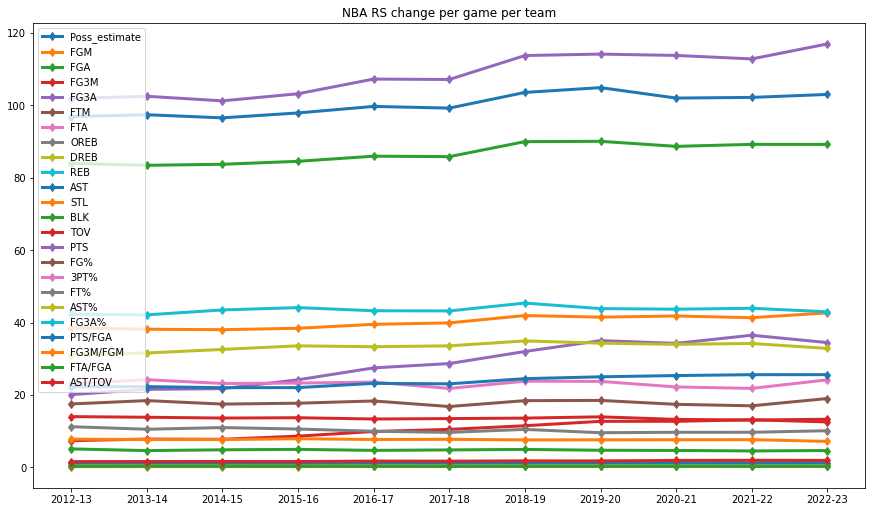

In [25]:
# Regular season changed per game per team
rs48_change_df = rs_change_df.copy()

for col in rs48_change_df.columns[2:17]:
    rs48_change_df[col] = (rs48_change_df[col]/rs48_change_df['MIN'])*48*5

rs48_change_df.drop(columns = 'MIN', inplace = True)

fig, ax = plt.subplots(figsize=(12,7), layout='constrained')

for col in rs48_change_df.columns[1:]:
    ax.plot(rs48_change_df['Year'], rs48_change_df[col], label = col, marker='d', linewidth=3)

ax.set_title('NBA RS change per game per team')
ax.legend()
plt.show()

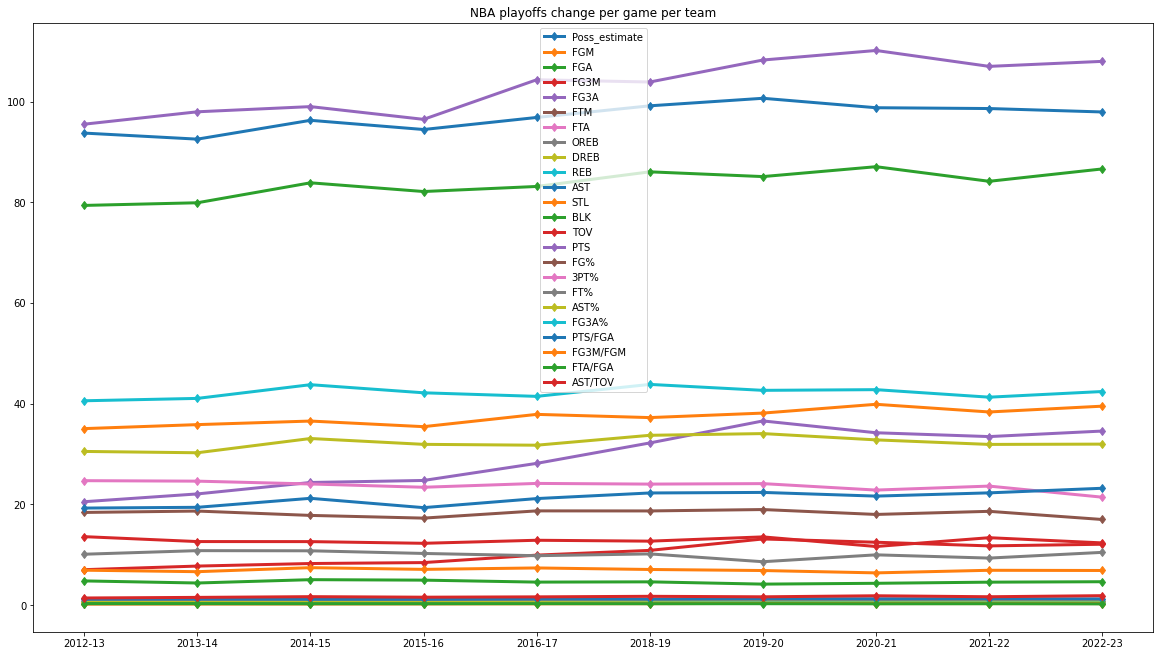

In [22]:
# Playoffs season changed per game per team
playoffs48_change_df = playoffs_change_df.copy()


for col in playoffs48_change_df.columns[2:17]:
    playoffs48_change_df[col] = (playoffs48_change_df[col]/playoffs48_change_df['MIN'])*48*5

playoffs48_change_df.drop(columns = 'MIN', inplace = True)

fig, ax = plt.subplots(figsize=(16,9), layout='constrained')

for col in playoffs48_change_df.columns[1:]:
    ax.plot(playoffs48_change_df['Year'], playoffs48_change_df[col], label = col, marker='d', linewidth=3)

ax.set_title('NBA playoffs change per game per team')
ax.legend()
plt.show()

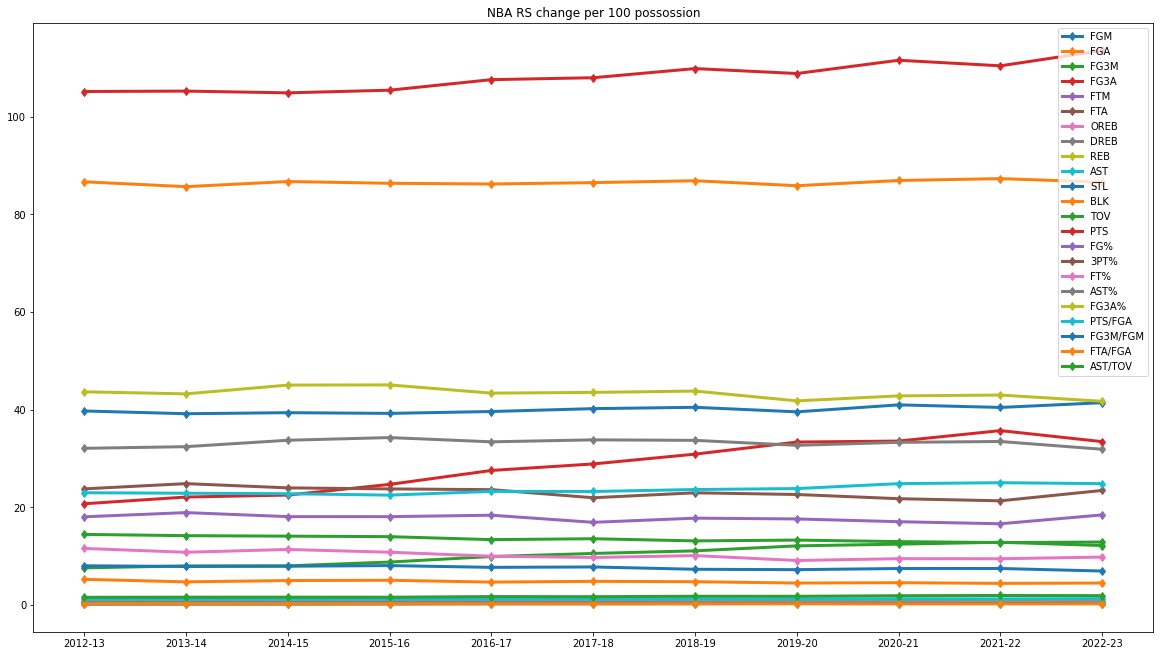

In [23]:
# Regular season changed per 100 possession
rs100_change_df = rs_change_df.copy()

for col in rs100_change_df.columns[3:17]:
    rs100_change_df[col] = (rs100_change_df[col]/rs100_change_df['Poss_estimate'])*100

rs100_change_df.drop(columns = ['MIN','Poss_estimate'], inplace = True)

fig, ax = plt.subplots(figsize=(16,9), layout='constrained')

for col in rs100_change_df.columns[1:]:
    ax.plot(rs100_change_df['Year'], rs100_change_df[col], label = col, marker='d', linewidth=3)

ax.set_title('NBA RS change per 100 possossion')
ax.legend()
plt.show()

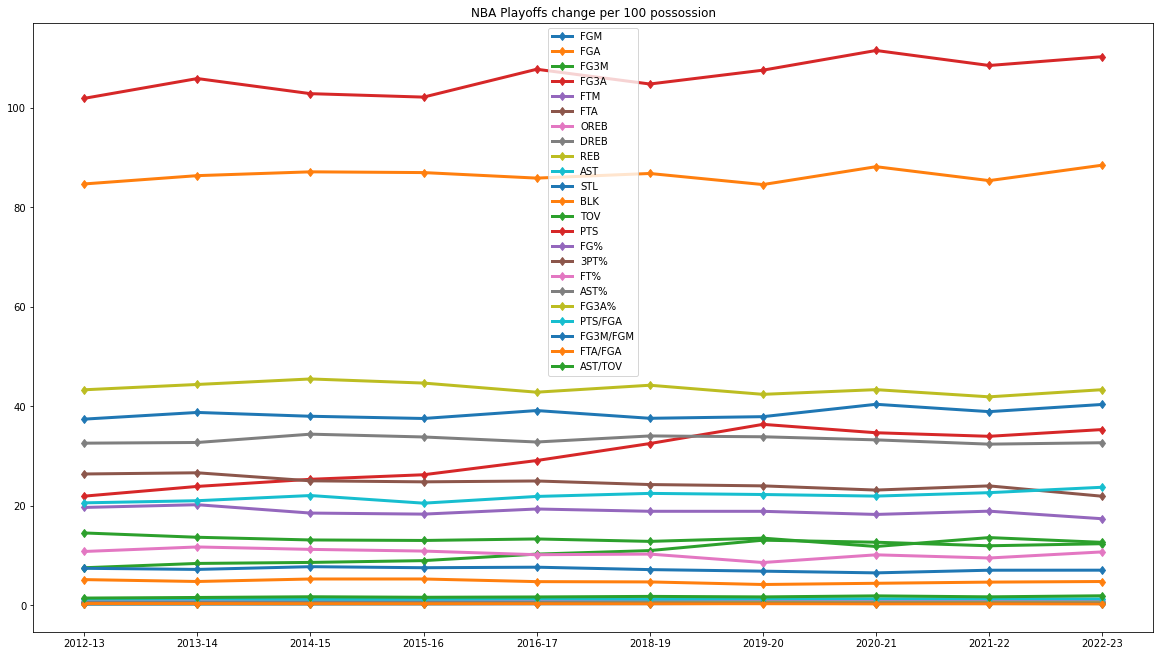

In [24]:
# Playoffs season changed per 100 possession
playoffs100_change_df = playoffs_change_df.copy()

for col in playoffs100_change_df.columns[3:17]:
    playoffs100_change_df[col] = (playoffs100_change_df[col]/playoffs100_change_df['Poss_estimate'])*100

playoffs100_change_df.drop(columns = ['MIN','Poss_estimate'], inplace = True)

fig, ax = plt.subplots(figsize=(16,9), layout='constrained')

for col in playoffs100_change_df.columns[1:]:
    ax.plot(playoffs100_change_df['Year'], playoffs100_change_df[col], label = col, marker='d', linewidth=3)

ax.set_title('NBA Playoffs change per 100 possossion')
ax.legend()
plt.show()

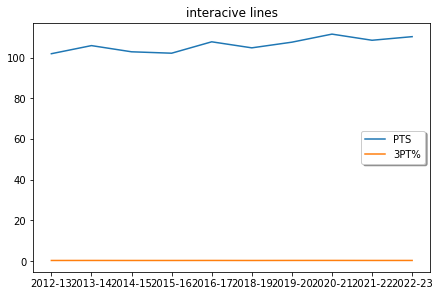

In [34]:
fig, ax = plt.subplots(layout='constrained')
ax.set_title('interacive lines')
(line1,) = ax.plot(playoffs100_change_df['Year'], playoffs100_change_df['PTS'], label = 'PTS')
(line2,) = ax.plot(playoffs100_change_df['Year'], playoffs100_change_df['3PT%'], label = '3PT%')

leg = ax.legend(fancybox=True, shadow=True)
lines = [line1, line2]
map_legend_to_ax = {}
pickradius = 5

for legend_line, ax_line in zip(leg.get_lines(), lines):
    legend_line.set_picker(pickradius)
    map_legend_to_ax[legend_line] = ax_line

def on_pick(event):
    legend_line = event.artist
    if legend_line not in map_legend_to_ax:
        return
    ax_line = map_legend_to_ax[legend_line]
    visible = not ax_line.get_visible()
    ax_line.set_visible(visible)
    legend_line.set_alpha(1.0 if visible else 0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)
leg.set_draggable(True)

plt.show()